# Exploratory Data Analysis

## AMEO (Aspiring Minds Employability Outcomes)

In [1]:
# Read the require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Description

* **DOJ:**	Date of joining the company	Candidates may not have accurately entered information.
* **DOL:**	Date of leaving the company	A value of "present" means the candidate continues to work at the company at the time of collecting this information
* **Designation:**	Designation offered in the job	
* **JobCity:**	City in which the candidate is offered the job	
* **Gender:**	Candidate's gender	m denotes Males and f denotes Females
* **DOB:**	Date of birth of candidate	
* **10percentage:**	Overall marks obtained in grade 10 examinations	Domain of values: [0,100]
* **10board:**	The school board whose curriculum the candidate followed in grade 10	
* **12graduation:**	Year of graduation - senior year high school	
* **12percentage:**	Overall marks obtained in grade 12 examinations	Domain of values: [0,100]
* **12board:**	The school board whose curriculum the candidate followed	
* **CollegeID:**	Unique ID identifying the university/college which the candidate attended for her/his undergraduate	Multiple candidates may belong to the same university/college in this dataset. College names have not been disclosed to maintain privacy.
* **CollegeTier:**	Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold as tagged as 1 and others as 2.	
* **Degree:**	Degree obtained/pursued by the candidate	"Relevant information here - 
* **Specialization:**	Specialization pursued by the candidate	
* **CollegeGPA:**	Aggregate GPA at graduation	"This is the raw information submitted by candidates. Some have submitted percentages while others have posted on a 10-point scale.
* **CollegeCityID:**	A unique ID to identify the city in which the college is located in.	
* **CollegeCityTier:**	The tier of the city in which the college is located in. This is annotated based on the population of the cities.	
* **CollegeState:**	Name of the state in which the college is located	The provided data set does not accurately capture state-wise distributions.
* **GraduationYear:**	Year of graduation (Bachelor's degree)	

In [2]:
df= pd.read_csv("ameo.csv")
df.head()

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,StateBoard,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,CBSE,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,CBSE,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,CBSE,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,CBSE,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.tail()

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,3993,280000,2011-10-01,2012-10-01 00:00:00,software engineer,Rajkot,m,1987-04-15,52.09,CBSE,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,3994,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,StateBoard,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,3995,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,StateBoard,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,3996,200000,2014-07-01,2015-01-01 00:00:00,software developer,Bangalore,f,1992-03-20,78.72,StateBoard,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,3997,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,CBSE,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [4]:
df.shape

(3998, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   int64  
 1   Salary                 3998 non-null   int64  
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeTier            3998 non-null   int64  
 14  Degree                 3998 non-null   object 
 15  Spec

In [6]:
df.isnull().sum()

Unnamed: 0               0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
d

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3998.0,1998.500000,1154.267517,0.0000,999.250000,1998.500000,2997.750000,3.997000e+03
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00
GraduationYear,3998.0,2012.105803,31.857271,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03


In [9]:
df.describe(include=['object']).T

,count,unique,top,freq
DOJ,3998,81,2014-07-01,199
DOL,3998,67,present,1875
Designation,3998,419,software engineer,539
JobCity,3998,230,Bangalore,687
Gender,3998,2,m,3041
DOB,3998,1872,1991-01-01,11
10board,3998,6,StateBoard,1884
12board,3998,4,StateBoard,2041
Degree,3998,4,B.Tech/B.E.,3700
Specialization,3998,7,CS,1601


In [10]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

<AxesSubplot:xlabel='Degree', ylabel='count'>

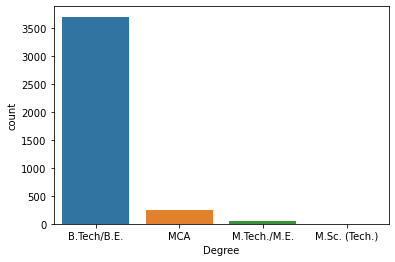

In [11]:
sns.countplot(df['Degree'])

### Conclusion
**From the above bar graph we can easily Say the most of the people are from B.Tech/B.E. which is `3700`, second most people are from MCA background which are `243` and leat people are from M.Sc.(Tech.) which are only 2.** 

According to data we can conclude that there is a huge scope in **B.Tech/B.E.** as compare to others.

In [12]:
df['12board'].unique()

array(['StateBoard', 'CBSE', 'CISCE', 'Unknown'], dtype=object)

<AxesSubplot:xlabel='12board', ylabel='count'>

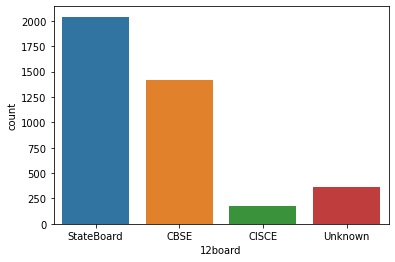

In [13]:
sns.countplot(df['12board'])

In [15]:
df['12board'].value_counts()

StateBoard    2041
CBSE          1419
Unknown        359
CISCE          179
Name: 12board, dtype: int64

### Conclusion
Most of the students completed theie 12th from **State Board** which is `2041` after that **CBSE** which is `1419` and according to this data only `179` students completed theie 12th from **CISCE** Board.

In [16]:
df['10board'].unique()

array(['StateBoard', 'CBSE', 'CISCE', 'Unknown', 'Matriculation Board',
       'anglo indian'], dtype=object)

In [17]:
df['10board'].value_counts()

StateBoard             1884
CBSE                   1418
Unknown                 352
CISCE                   285
Matriculation Board      56
anglo indian              3
Name: 10board, dtype: int64

<AxesSubplot:xlabel='10board', ylabel='count'>

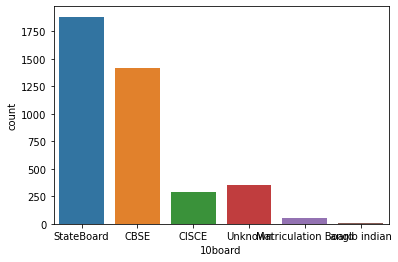

In [18]:
sns.countplot(df['10board'])

### Conclusion
Most of the students completed 10th from **State Board** which is `1884`.

In [19]:
df['Specialization'].value_counts()

CS       1601
EC       1123
IT        688
EL        281
ME        220
other      56
CE         29
Name: Specialization, dtype: int64

<AxesSubplot:xlabel='Specialization', ylabel='count'>

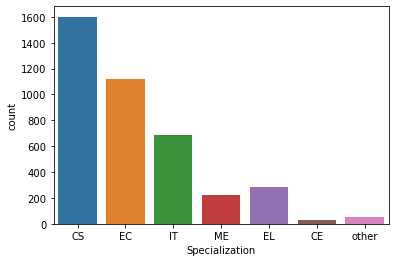

In [20]:
sns.countplot(df['Specialization'])

### Conclusion 
From the above bar graph we can say that the people who got placed are from **Computer Science** background which are `1601` and then from **Electronics Communication** background which are `1123`. 

According to our data we can conclude that there is a high demand of **Computer Science** Engineers in the market.

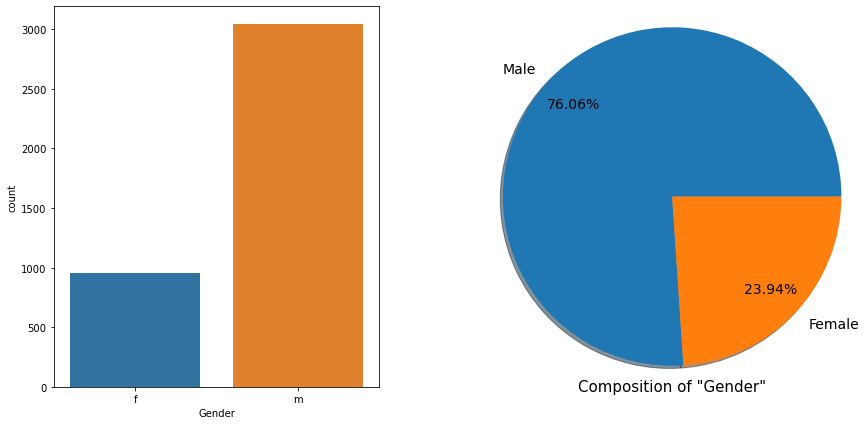

In [23]:
# checking the composition of Gender
plt.figure(figsize=(14,7))

# barplot
my_palette = sns.color_palette("Set2")[:2]
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Gender"])

# pieplot
ax2 = plt.subplot(1,2,2)

plt.pie(df["Gender"].value_counts(),
        labels=['Male', 'Female'],
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Gender"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

### Conclusion
**According to bar plot and pie chart we can say that there are 76% Malesand there are 24% Females.**

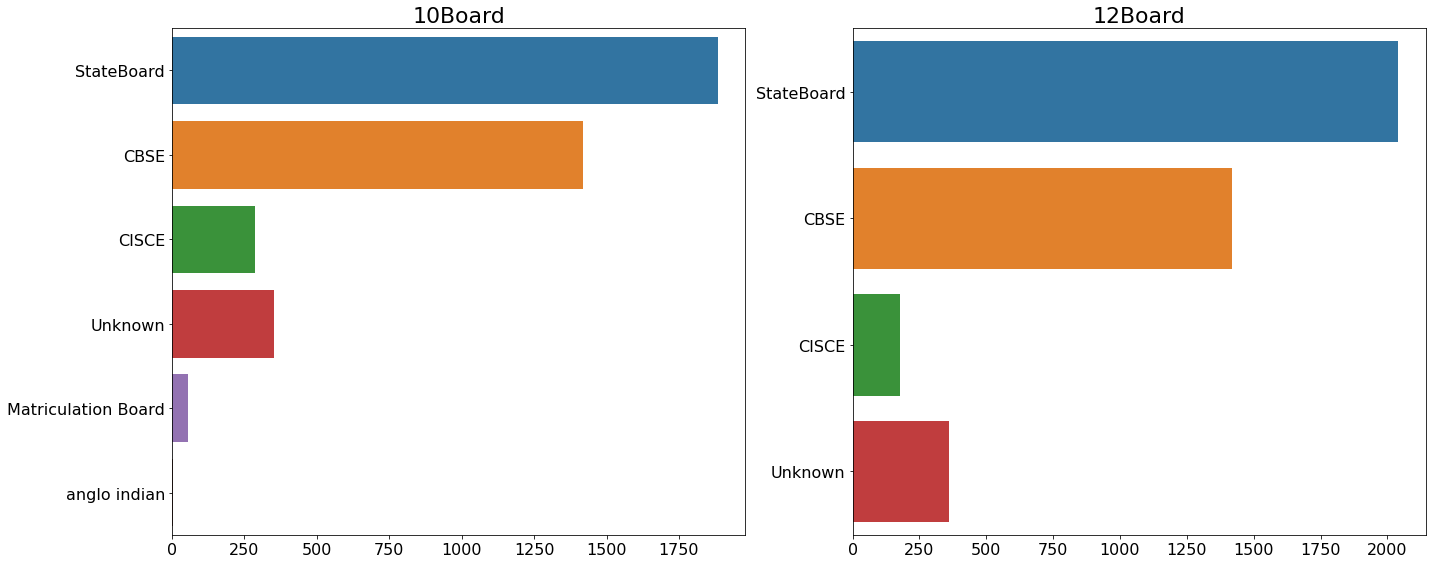

In [24]:
plt.figure(figsize=(20,120))
plotnumber = 1
columns_cat = ['10board','12board']

for col in columns_cat:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.title(col.title(), fontsize=22)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

### Conclusion

According to above bar graph we can easily say that most of the students completed there $10th$ and $12th$ from **State Board**.

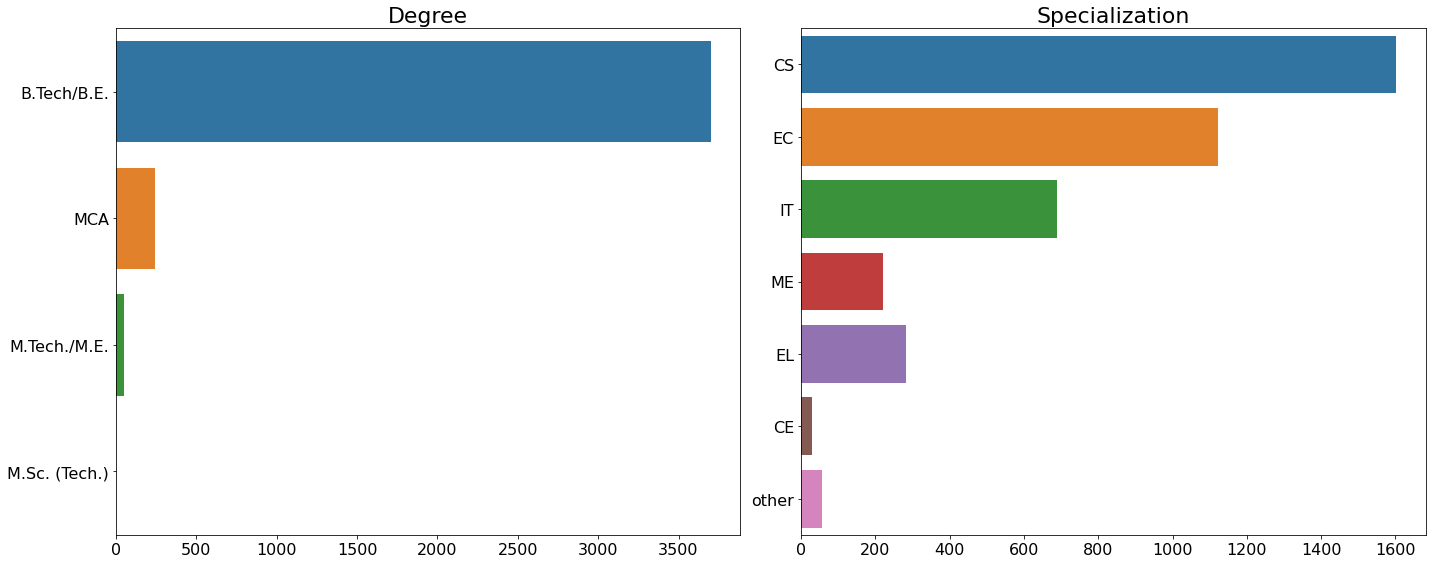

In [25]:
plt.figure(figsize=(20,120))
plotnumber = 1
columns_cat = ['Degree','Specialization']

for col in columns_cat:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.title(col.title(), fontsize=22)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

### Conclusion

According to above bar graph we can easily say that most of the students completed there **B.Tech/B.E. Degree** with **Specialization** in **Computer Science** and **Electronics Communications**.

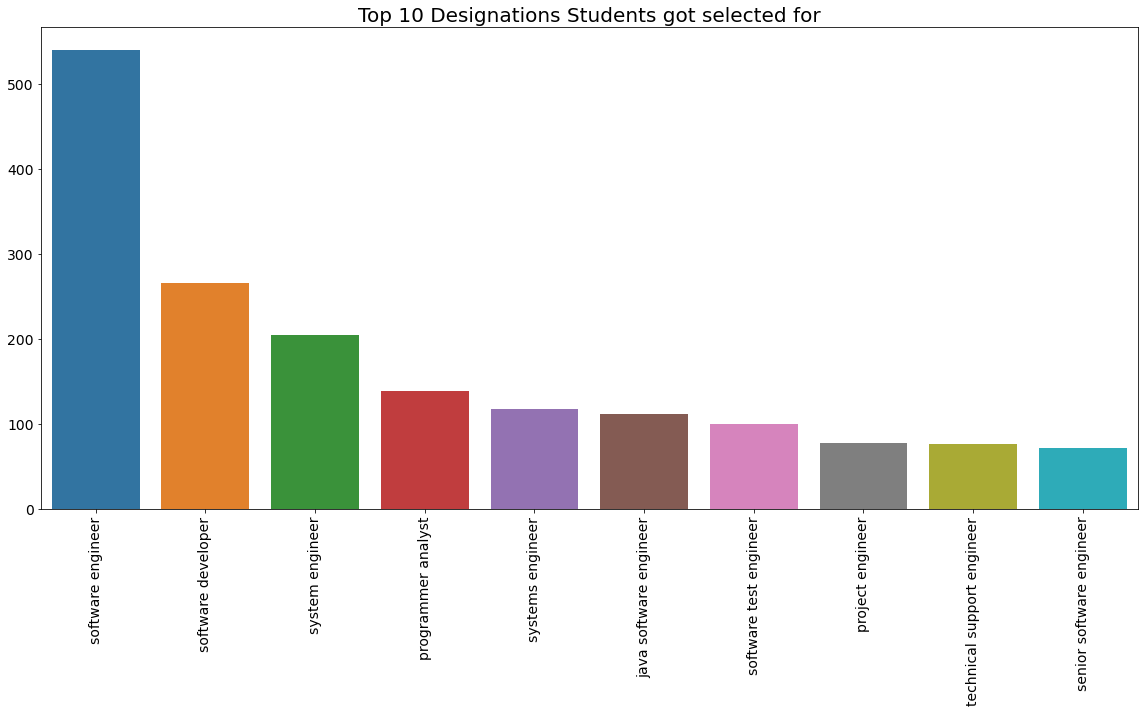

In [26]:
plt.figure(figsize = (16,10))
sns.countplot(data = df, x = 'Designation', order = df['Designation'].value_counts().index[:10])
plt.xticks(fontsize=14, rotation = 90)
plt.yticks(fontsize=14)
plt.title('Top 10 Designations Students got selected for', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

### Conclusion

According to above bar graph we can easily say that most of the students got placed as **Software Engineer, Software Developer** and **System Engineer**.

We can conclude that there is a high hiring as **Software Engineer, Software Developer** and **System Engineer**.

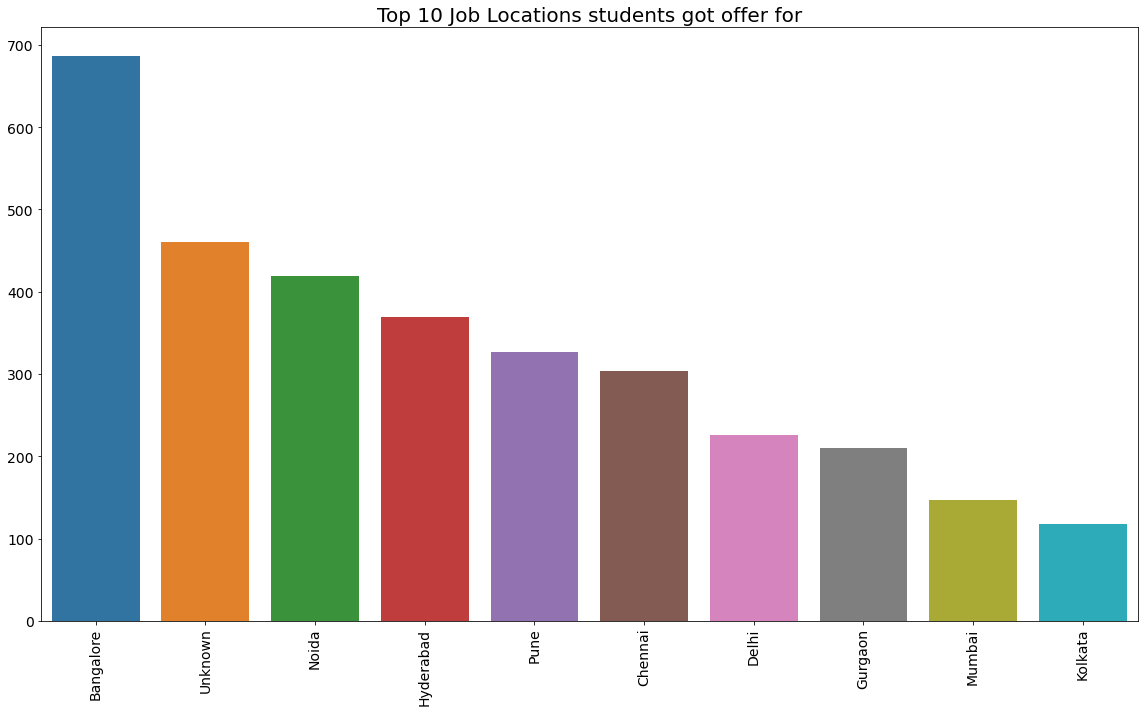

In [27]:
plt.figure(figsize = (16,10))
sns.countplot(data = df, x = 'JobCity', order = df['JobCity'].value_counts().index[:10])
plt.xticks(fontsize=14, rotation = 90)
plt.yticks(fontsize=14)
plt.title('Top 10 Job Locations students got offer for', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

### Conclusion

According to above bar graph we can easily say that most of the students got placed at **Bangalore, Noida** and **Hyderabad** cities.

We can conclude that **Bangalore, Noida** and **Hyderabad** are best cities for Job market in IT Industry.

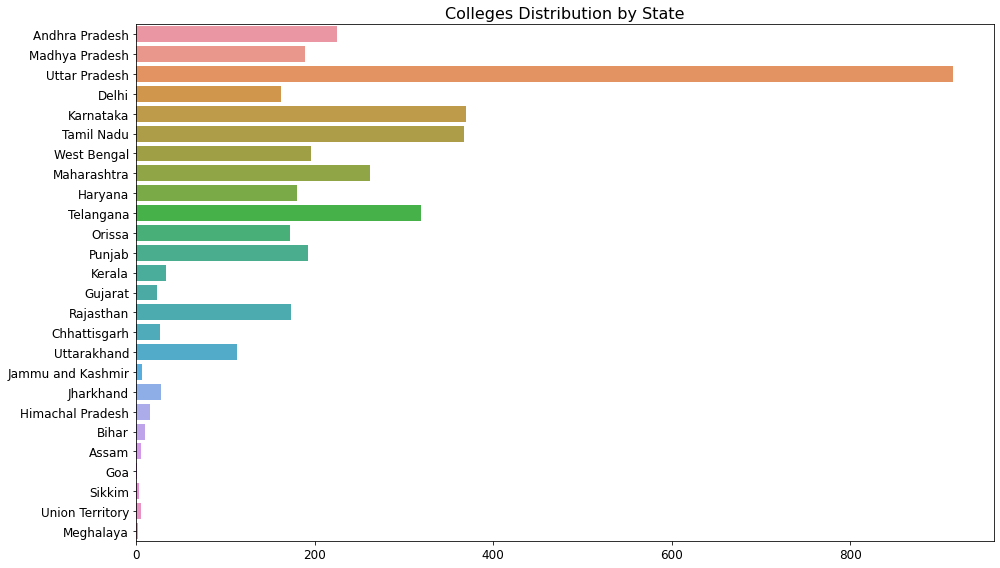

In [28]:
plt.figure(figsize=(14,8))
sns.countplot(data=df, y='CollegeState')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Colleges Distribution by State', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

### Conclusion

According to above bar graph we can easily say that most of the students are hired from **Uttar Pradesh, Karnataka** and **Tamil Nadu** states.

We can conclude that **Uttar Pradesh, Karnataka** and **Tamil Nadu** states produce more jobs. 

In [30]:
num_col= [num for num in df.columns if df[num].dtypes !='O']
num_col

['Unnamed: 0',
 'Salary',
 '10percentage',
 '12graduation',
 '12percentage',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityID',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

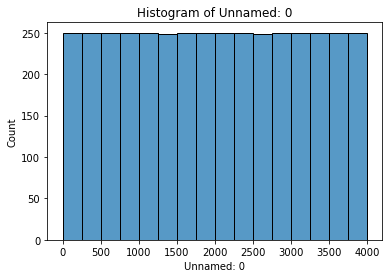

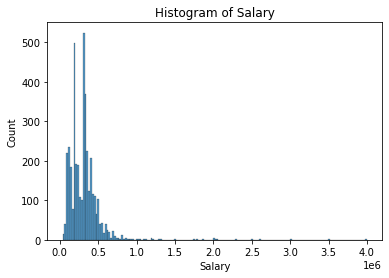

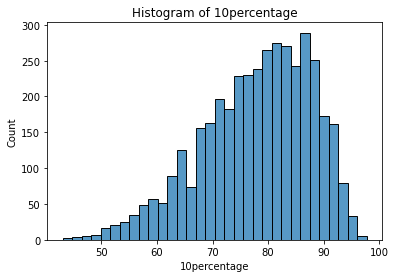

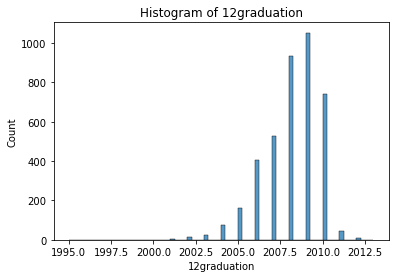

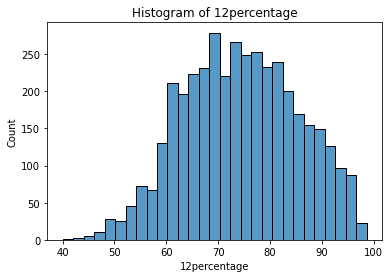

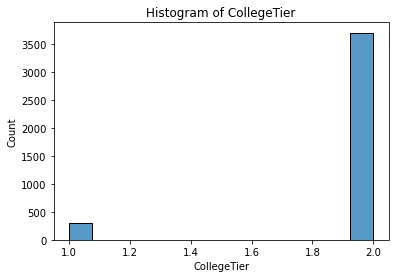

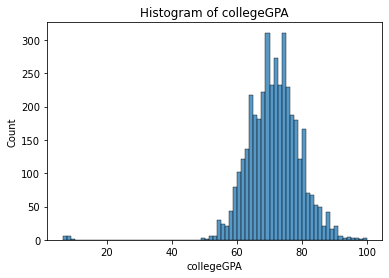

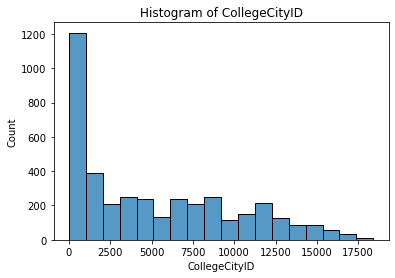

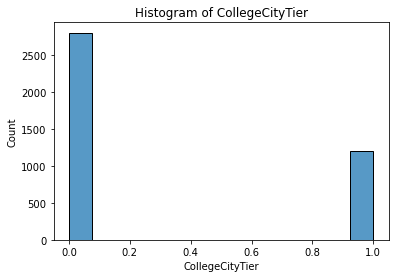

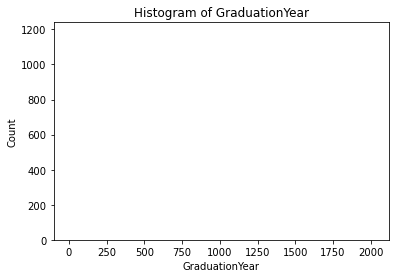

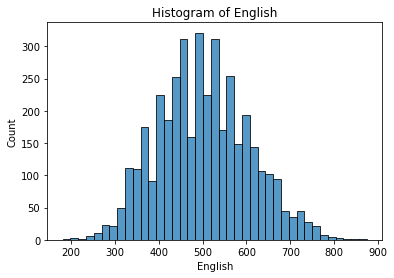

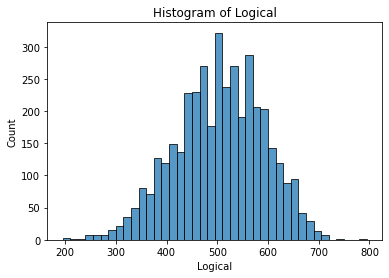

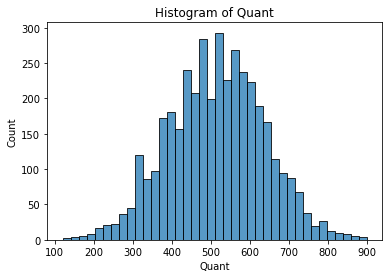

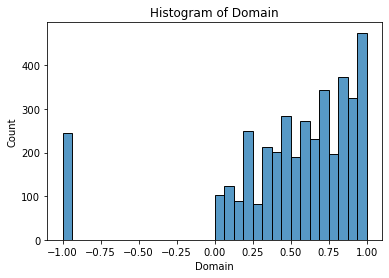

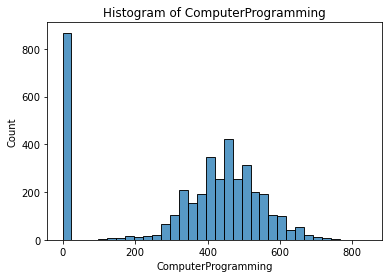

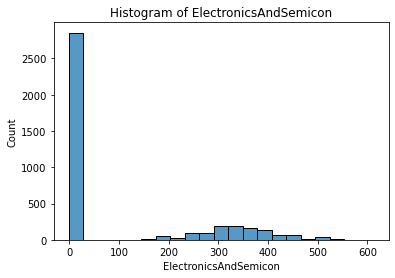

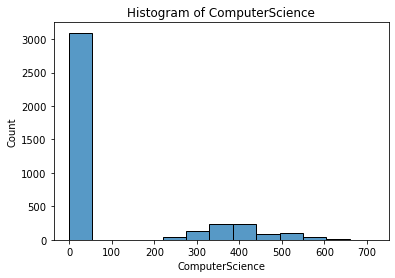

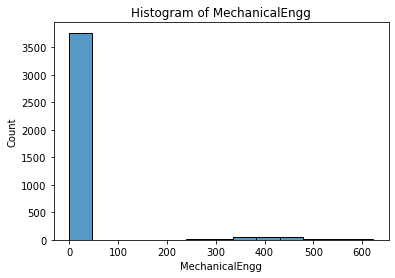

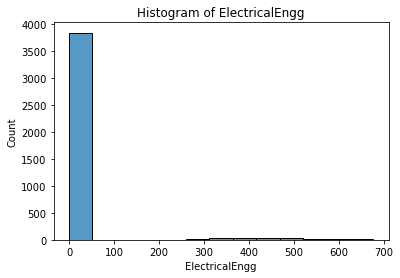

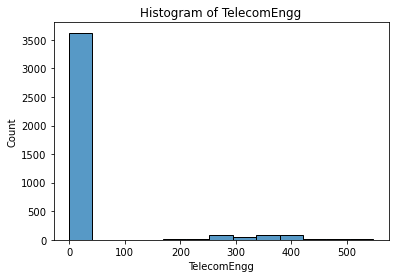

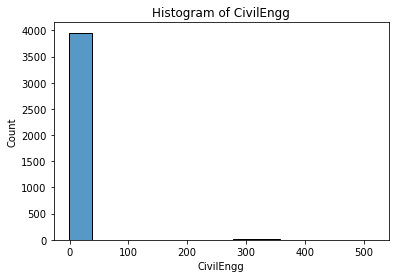

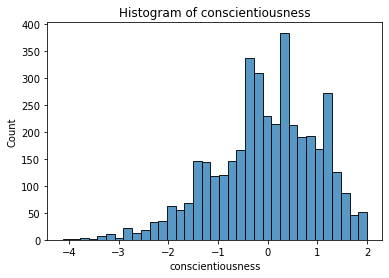

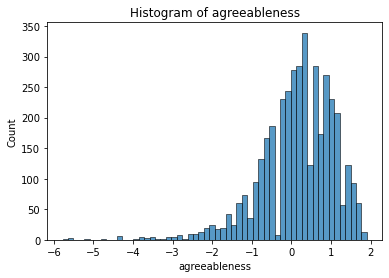

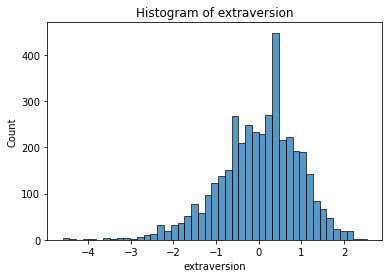

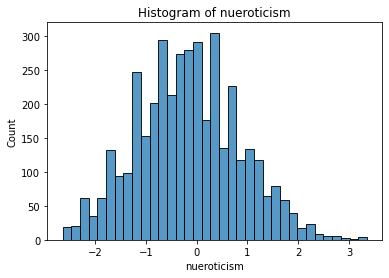

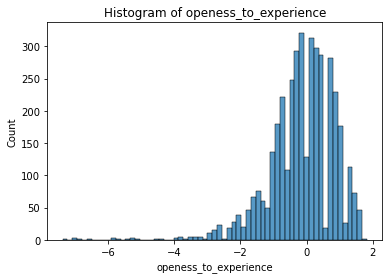

In [31]:
for col in num_col:

    # Create histogram 
    sns.histplot(data=df, x=col, kde=False)
    plt.title(f'Histogram of {col}')
    plt.show()

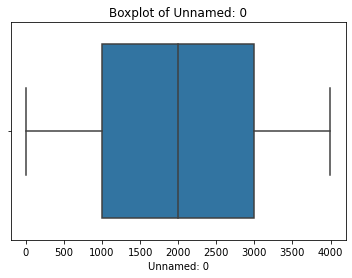

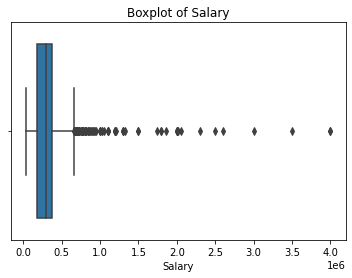

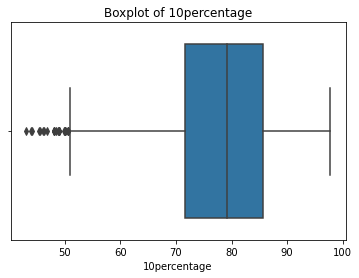

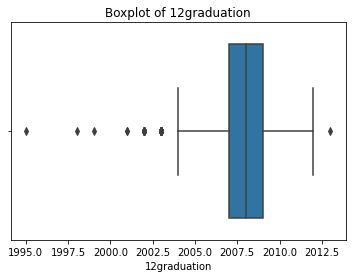

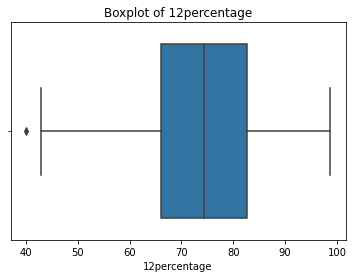

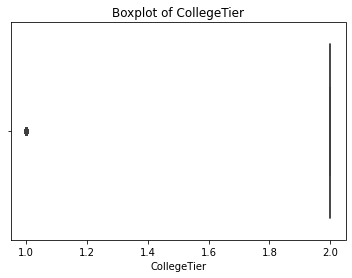

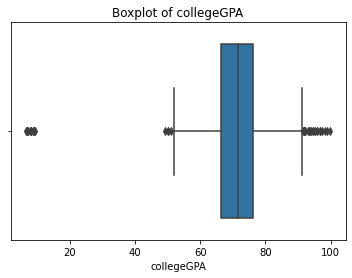

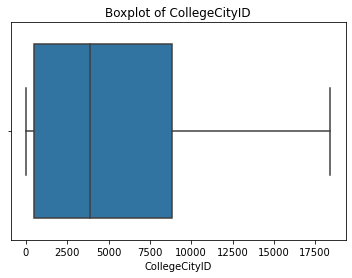

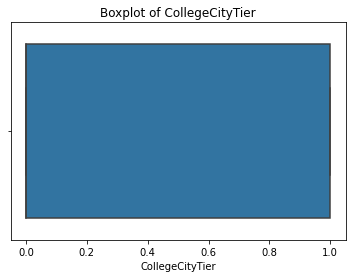

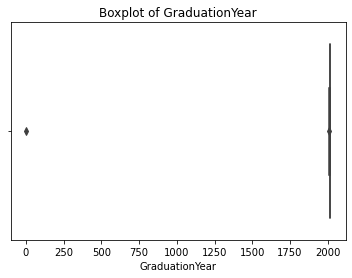

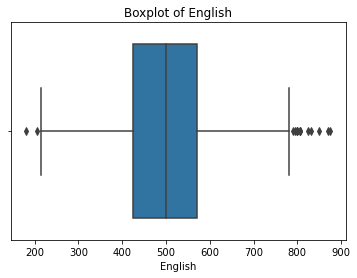

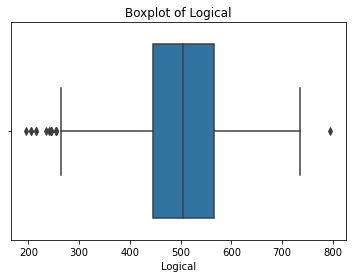

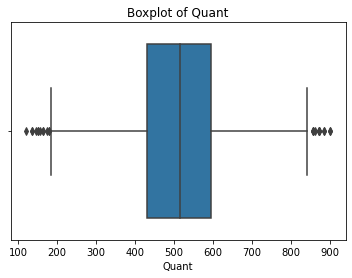

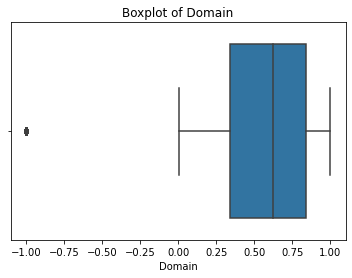

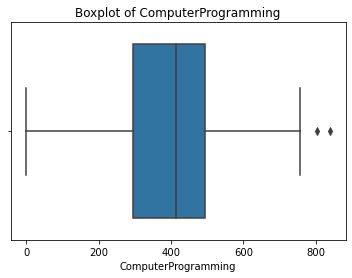

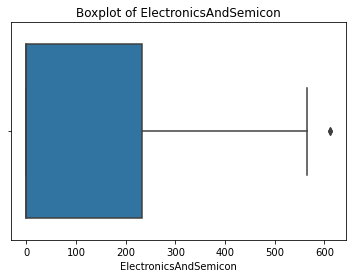

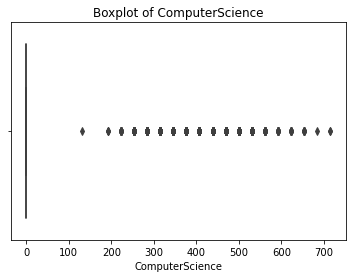

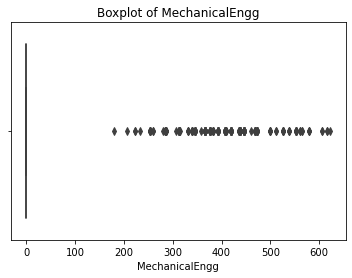

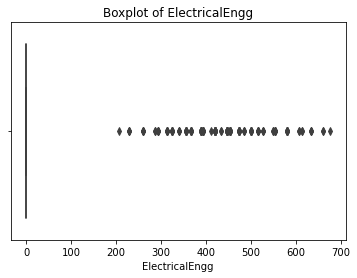

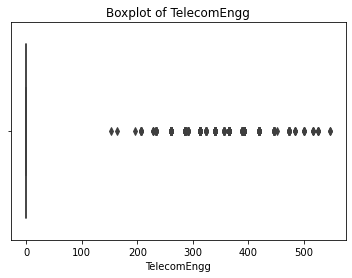

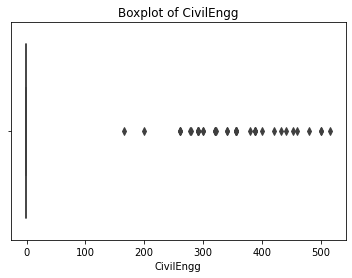

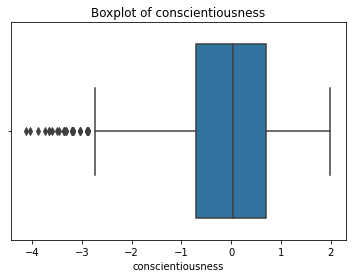

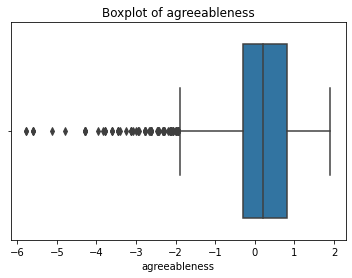

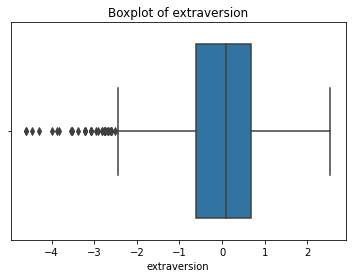

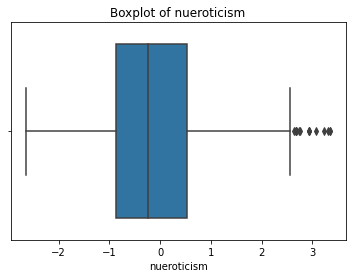

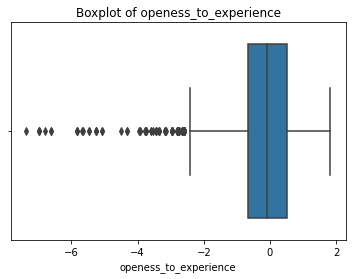

In [32]:
for col in num_col:
    # Create boxplot
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

No outliers found in Unnamed: 0


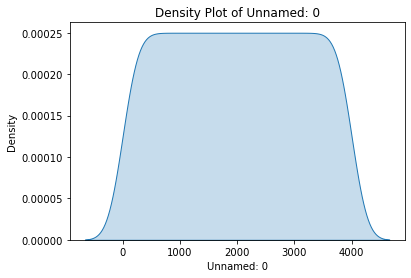

Salary outliers: [1100000, 800000, 1500000, 1200000, 675000, 1860000, 660000, 700000, 785000, 700000, 690000, 700000, 1110000, 1200000, 1000000, 715000, 820000, 720000, 2600000, 715000, 800000, 1025000, 775000, 1300000, 3500000, 910000, 730000, 680000, 1300000, 1050000, 2000000, 700000, 860000, 800000, 800000, 690000, 4000000, 2020000, 700000, 700000, 760000, 800000, 870000, 2050000, 700000, 1320000, 755000, 880000, 3000000, 700000, 720000, 820000, 2500000, 2300000, 950000, 1300000, 1200000, 4000000, 700000, 700000, 1800000, 725000, 1200000, 720000, 700000, 930000, 680000, 1000000, 750000, 1000000, 705000, 1745000, 2000000, 1800000, 850000, 845000, 700000, 660000, 820000, 750000, 1200000, 670000, 1030000, 770000, 800000, 720000, 900000, 1210000, 1500000, 1100000, 680000, 675000, 700000, 800000, 700000, 2000000, 2000000, 810000, 925000, 720000, 820000, 700000, 1100000, 700000, 775000, 850000, 730000, 700000, 800000]


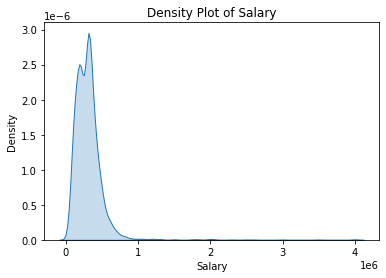

10percentage outliers: [50.6, 44.16, 44.0, 45.6, 48.0, 49.0, 48.0, 49.0, 48.8, 49.0, 49.0, 48.5, 48.0, 50.6, 43.0, 50.0, 49.0, 45.33, 46.24, 48.0, 50.5, 50.0, 50.0, 50.66, 46.8, 50.0, 50.0, 50.0, 46.0, 49.9]


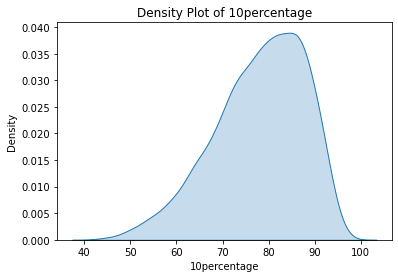

12graduation outliers: [1995, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2002, 2001, 2002, 2003, 2003, 2002, 2002, 1998, 2003, 2013, 2001, 2003, 2003, 2003, 2003, 2003, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003, 1999, 2002, 2003, 2003, 2002, 2003, 2002, 2003, 2002, 2002, 2003, 2002]


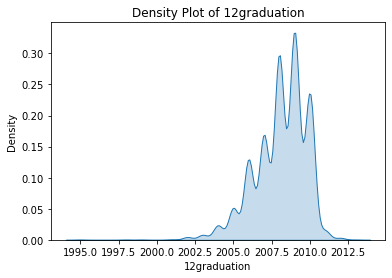

12percentage outliers: [40.0]


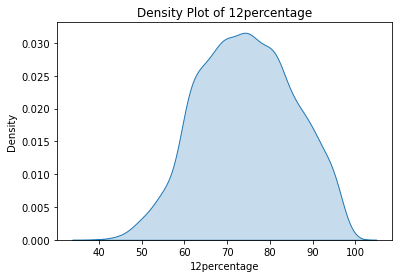

CollegeTier outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


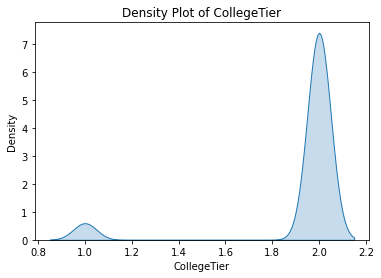

collegeGPA outliers: [8.58, 92.1, 6.63, 93.0, 92.0, 93.6, 99.93, 6.8, 94.5, 50.0, 92.3, 96.0, 97.3, 93.3, 6.85, 8.07, 96.7, 94.7, 7.56, 6.95, 95.3, 8.13, 9.3, 92.0, 8.88, 8.89, 94.0, 49.07, 92.0, 94.6, 98.4, 95.7, 51.0, 6.45, 96.9, 50.0, 91.6, 99.0]


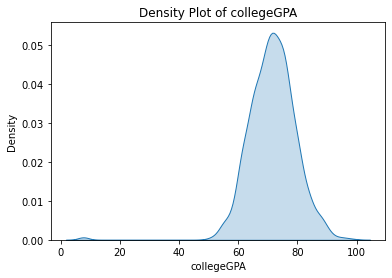

No outliers found in CollegeCityID


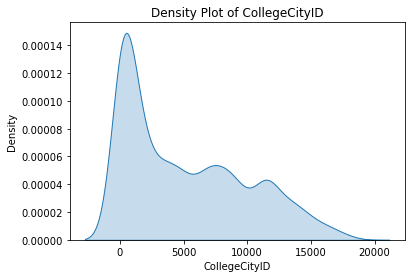

No outliers found in CollegeCityTier


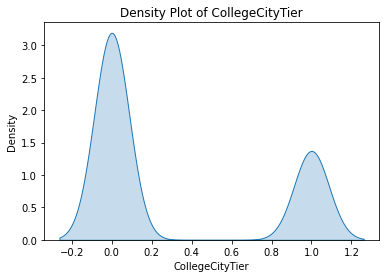

GraduationYear outliers: [0, 2007]


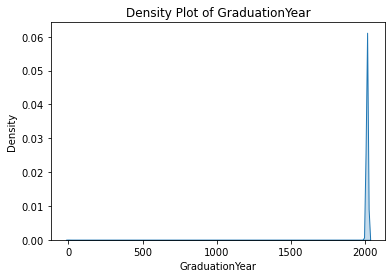

English outliers: [875, 825, 870, 790, 800, 205, 805, 180, 830, 795, 800, 800, 805, 805, 850]


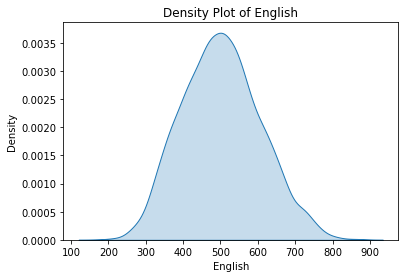

Logical outliers: [255, 205, 245, 215, 215, 795, 255, 245, 255, 255, 240, 195, 245, 245, 245, 205, 235, 245]


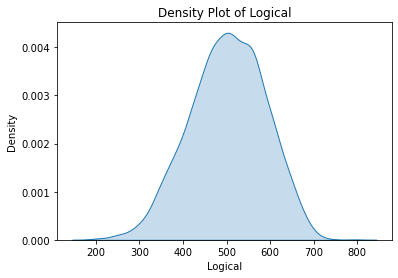

Quant outliers: [870, 165, 180, 860, 180, 870, 175, 870, 870, 135, 855, 145, 870, 885, 120, 900, 135, 165, 900, 885, 855, 855, 150, 150, 155]


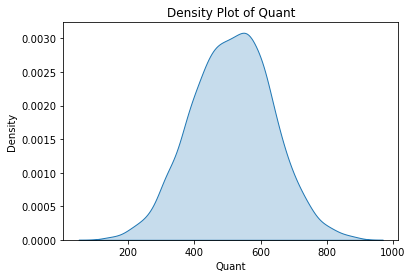

Domain outliers: [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0

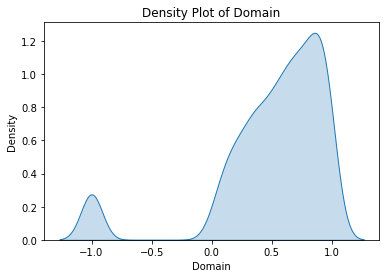

ComputerProgramming outliers: [804, 840]


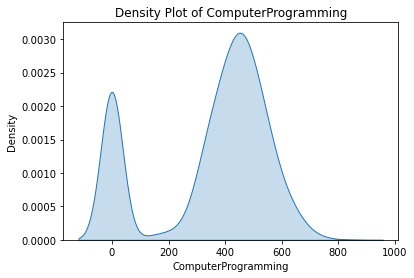

ElectronicsAndSemicon outliers: [612, 612]


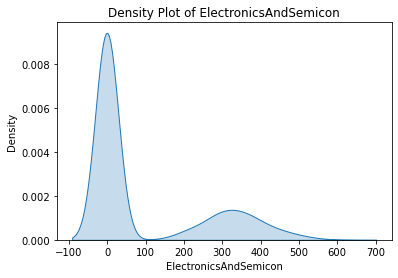

ComputerScience outliers: [407, 346, 376, 500, 346, 438, 376, 407, 500, 346, 346, 315, 253, 346, 376, 346, 500, 469, 192, 530, 438, 469, 500, 346, 438, 315, 500, 346, 407, 315, 284, 284, 438, 253, 469, 284, 346, 438, 376, 530, 223, 376, 376, 500, 407, 376, 469, 376, 438, 561, 315, 407, 407, 376, 376, 438, 407, 315, 407, 315, 407, 530, 407, 407, 438, 469, 376, 407, 376, 438, 561, 561, 407, 684, 438, 315, 407, 500, 376, 346, 438, 407, 315, 346, 407, 284, 438, 223, 376, 530, 407, 530, 284, 346, 346, 530, 376, 438, 407, 253, 346, 469, 346, 376, 438, 438, 376, 346, 346, 376, 530, 469, 376, 407, 346, 407, 376, 407, 530, 469, 376, 315, 407, 469, 592, 315, 469, 315, 315, 530, 315, 500, 438, 592, 438, 346, 315, 407, 438, 438, 561, 469, 376, 376, 253, 438, 438, 438, 407, 346, 623, 315, 500, 469, 284, 407, 561, 315, 315, 500, 315, 253, 530, 346, 346, 407, 653, 284, 346, 253, 315, 469, 315, 407, 376, 284, 469, 407, 653, 376, 346, 530, 346, 315, 253, 376, 407, 253, 376, 407, 469, 376, 253, 376, 438

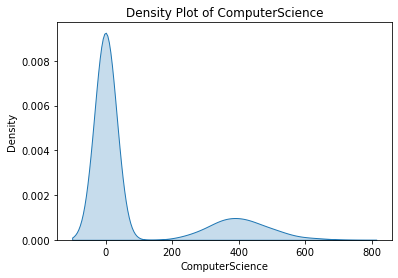

MechanicalEngg outliers: [469, 313, 286, 253, 366, 446, 206, 438, 446, 332, 393, 366, 253, 383, 286, 393, 260, 438, 561, 553, 446, 376, 313, 526, 376, 313, 553, 284, 469, 409, 366, 409, 366, 473, 340, 223, 420, 383, 538, 346, 393, 286, 393, 553, 438, 538, 435, 438, 512, 407, 469, 580, 366, 393, 280, 366, 366, 393, 435, 340, 473, 438, 469, 358, 512, 313, 366, 500, 473, 407, 446, 313, 446, 366, 420, 260, 580, 393, 340, 420, 473, 383, 313, 332, 340, 315, 254, 473, 553, 469, 446, 223, 376, 376, 366, 332, 553, 438, 553, 438, 616, 564, 407, 438, 420, 233, 306, 313, 383, 446, 253, 253, 435, 538, 438, 420, 409, 616, 346, 407, 366, 286, 407, 346, 393, 346, 393, 553, 473, 473, 553, 393, 313, 564, 420, 500, 461, 346, 420, 180, 393, 376, 393, 366, 420, 473, 435, 526, 500, 420, 376, 366, 383, 313, 340, 446, 438, 346, 376, 346, 407, 407, 407, 366, 438, 366, 446, 446, 313, 376, 286, 376, 438, 435, 500, 606, 376, 407, 420, 606, 313, 446, 420, 376, 526, 409, 346, 313, 446, 469, 446, 420, 313, 526, 446,

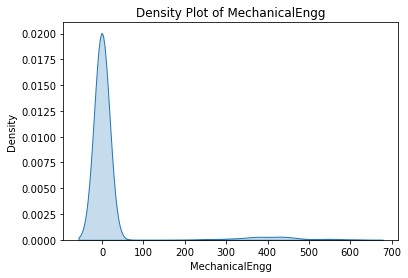

ElectricalEngg outliers: [484, 606, 393, 500, 553, 580, 446, 446, 446, 446, 420, 324, 393, 388, 356, 313, 633, 388, 516, 356, 366, 420, 612, 580, 388, 452, 452, 324, 446, 388, 553, 500, 526, 420, 324, 446, 452, 452, 548, 516, 388, 228, 516, 500, 393, 324, 433, 553, 526, 633, 473, 473, 388, 420, 420, 420, 580, 553, 356, 526, 676, 228, 292, 660, 446, 452, 433, 411, 393, 612, 388, 473, 286, 420, 484, 446, 420, 420, 452, 324, 446, 340, 313, 446, 388, 473, 356, 324, 580, 366, 366, 446, 286, 366, 313, 452, 292, 473, 388, 393, 366, 260, 340, 260, 356, 356, 324, 260, 500, 356, 500, 452, 388, 516, 473, 452, 292, 420, 580, 206, 420, 313, 548, 446, 313, 553, 340, 473, 633, 484, 356, 313, 500, 420, 260, 500, 366, 420, 228, 580, 580, 516, 446, 292, 500, 420, 473, 393, 553, 473, 446, 420, 393, 420, 452, 473, 660, 356, 366, 606, 580]


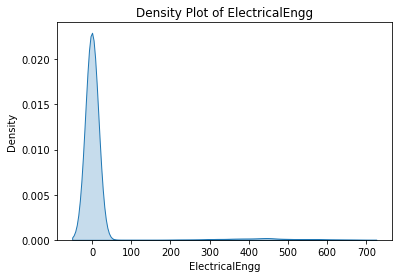

TelecomEngg outliers: [206, 313, 420, 260, 393, 260, 393, 366, 260, 313, 313, 446, 206, 324, 340, 340, 340, 260, 446, 286, 286, 446, 340, 366, 366, 393, 473, 393, 340, 484, 420, 484, 366, 286, 366, 452, 260, 286, 393, 286, 260, 313, 366, 340, 233, 366, 286, 292, 286, 393, 292, 340, 526, 484, 153, 340, 260, 233, 526, 286, 516, 324, 313, 420, 286, 260, 292, 340, 313, 366, 356, 420, 420, 260, 292, 393, 393, 548, 366, 420, 340, 260, 366, 446, 446, 340, 233, 228, 420, 292, 393, 286, 393, 420, 393, 233, 393, 286, 260, 548, 473, 473, 366, 340, 313, 260, 233, 446, 260, 366, 313, 196, 340, 313, 366, 393, 340, 366, 393, 260, 393, 324, 356, 393, 366, 420, 260, 313, 366, 164, 473, 292, 340, 356, 233, 393, 313, 388, 516, 366, 286, 366, 420, 500, 260, 484, 473, 446, 473, 340, 324, 366, 313, 446, 313, 206, 260, 260, 473, 324, 340, 366, 393, 286, 340, 366, 473, 366, 420, 313, 286, 292, 420, 313, 393, 366, 313, 356, 292, 313, 473, 366, 356, 340, 286, 366, 324, 340, 286, 393, 286, 393, 388, 313, 366, 47

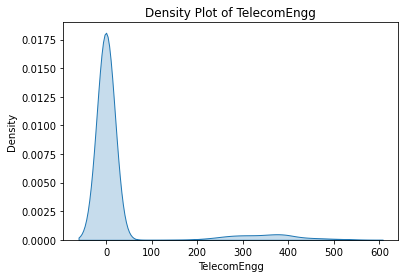

CivilEngg outliers: [320, 400, 388, 320, 260, 440, 356, 356, 292, 500, 200, 300, 388, 500, 452, 322, 340, 260, 260, 166, 388, 277, 356, 356, 516, 380, 292, 320, 356, 433, 292, 300, 356, 292, 280, 340, 420, 292, 388, 292, 460, 480]


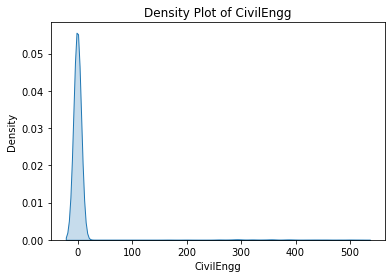

conscientiousness outliers: [-3.1994, -2.8879, -3.1994, -3.6631, -3.606, -3.3539, -3.3539, -3.3188, -2.8879, -3.1752, -3.4624, -3.0448, -3.1752, -3.3539, -3.6631, -2.8903, -3.1994, -3.1994, -4.1267, -3.3539, -2.8903, -2.8879, -2.8879, -2.8879, -3.3539, -3.1752, -3.8933, -3.1752, -3.5085, -2.8903, -3.7496, -3.0448, -4.0369, -3.1752, -3.0315, -3.3188, -3.1994, -2.8903, -3.0448]


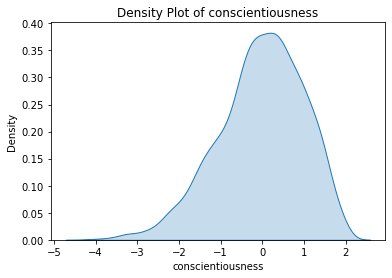

agreeableness outliers: [-2.1186, -2.4516, -2.6847, -3.7836, -2.1186, -4.2831, -1.9953, -2.9314, -1.9521, -5.6151, -1.9521, -2.4633, -2.6193, -2.4516, -5.1156, -1.9953, -2.1186, -1.9521, -1.9521, -1.9521, -2.1903, -1.9953, -3.6171, -1.9521, -2.6181, -2.7754, -2.1513, -2.2851, -2.3073, -3.4506, -3.0874, -2.4516, -5.7816, -1.9521, -2.1186, -4.2831, -4.2831, -2.3073, -2.2851, -2.4516, -3.1176, -2.2851, -3.7836, -2.6193, -1.9521, -3.1176, -2.1186, -2.1186, -2.1186, -2.1513, -2.2851, -1.9521, -1.9521, -2.1186, -2.6193, -1.9521, -2.1186, -3.1264, -3.0094, -2.1513, -2.1513, -3.6171, -3.6171, -1.9521, -3.4506, -3.4506, -2.6181, -2.0733, -2.7754, -3.9501, -2.3073, -2.9511, -2.3073, -4.2831, -4.7826, -2.1513, -1.9953, -2.3073, -1.9521, -3.8284, -2.6193, -2.7846, -2.4516, -1.9953, -2.4516, -2.7754, -2.7846, -1.9953, -2.0733, -2.7754, -2.2851, -2.4516, -3.2434, -2.9511, -5.6151, -2.6181, -2.3073, -1.9953, -2.7754, -3.1176, -2.2851, -3.4506, -4.2831, -1.9953, -2.1186, -5.6151, -3.7836, -2.6193, -2.

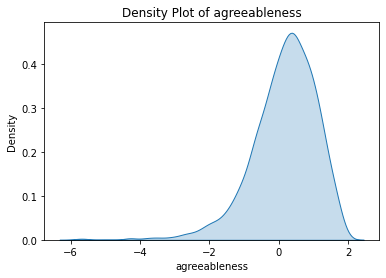

extraversion outliers: [-2.6028, -3.2176, -4.6009, -3.525, -3.0639, -3.2176, -2.775, -2.6662, -4.6009, -2.6028, -2.9565, -4.2935, -3.0639, -2.7565, -3.537, -3.525, -2.6662, -2.7565, -2.7565, -3.8636, -3.0639, -2.7565, -2.9102, -3.2176, -3.2176, -3.3713, -2.6662, -3.9861, -2.6662, -2.521, -2.8113, -2.8113, -3.0639, -2.6028, -3.8324, -2.6028, -2.6028, -2.6028, -4.4472, -2.6028]


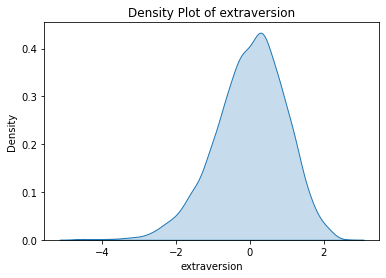

nueroticism outliers: [2.6475, 2.9349, 3.3525, 3.3525, 3.235, 2.6814, 3.0617, 2.765, 2.7356, 2.9349, 2.6814, 3.3152, 2.6814, 2.6814, 2.9349]


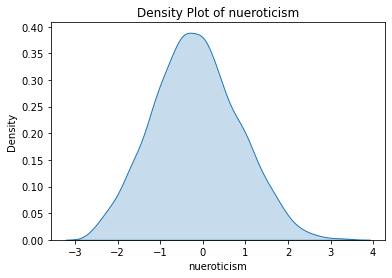

openess_to_experience outliers: [-2.7769, -5.0763, -3.1602, -5.477, -2.9731, -5.2679, -3.9605, -4.5015, -6.9925, -3.4471, -5.2679, -2.5853, -3.3518, -3.735, -2.9686, -2.5853, -2.5853, -4.3099, -2.5853, -2.7595, -2.5853, -3.4471, -3.735, -2.7769, -6.9925, -2.5853, -3.3518, -5.8428, -2.9686, -2.5853, -2.5853, -2.7595, -3.5434, -3.3518, -6.8009, -2.5853, -2.5853, -2.9686, -3.9266, -3.1602, -2.9686, -2.6572, -2.5853, -2.5853, -3.6051, -3.763, -2.7769, -5.686, -2.6572, -4.3099, -2.5853, -2.9686, -2.8152, -2.6572, -3.4471, -5.6512, -2.8152, -3.1602, -2.7769, -2.7769, -5.4595, -2.6572, -3.3518, -5.8428, -3.1311, -3.763, -2.7769, -3.735, -2.5853, -2.5853, -2.5853, -5.8428, -3.3518, -6.6092, -3.1602, -3.9266, -2.8152, -2.5853, -2.9686, -5.2679, -5.0763, -2.5853, -7.3757, -2.9731, -2.7769, -6.6092, -2.7769, -6.9925, -2.7769, -3.6051, -2.5853, -2.7769, -2.7769, -2.9686, -2.9731]


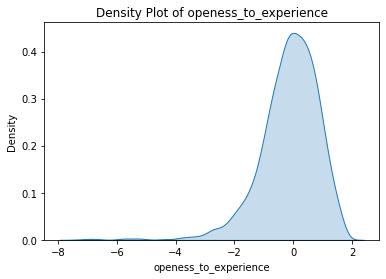

In [34]:
for col in num_col:
    # Identify outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5 * IQR)
    lower_bound = Q1 - (1.5 * IQR)
    outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    if not outliers.empty:
        print(f"{col} outliers: {outliers[col].tolist()}")
    else:
        print(f"No outliers found in {col}")
    
    # Create density plot
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f'Density Plot of {col}')
    plt.show()


## Bivariate

In [35]:
df.head()

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,StateBoard,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,CBSE,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,CBSE,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,CBSE,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,CBSE,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [36]:
df.columns

Index(['Unnamed: 0', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [37]:
df_plot= df[df['DOL'] !='present'].reset_index()

In [38]:
df_plot['DOL']  = pd.to_datetime(df_plot['DOL'])
df_plot

,index,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,4,4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
1,6,6,300000,2014-08-01,2015-05-01,java software engineer,Bangalore,m,1993-02-01,86.08,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
2,7,7,400000,2014-07-01,2015-07-01,mechanical engineer,Bangalore,m,1992-05-27,92.00,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
3,10,10,600000,2011-04-01,2015-04-01,senior php developer,Bangalore,m,1989-06-24,88.60,...,-1,-1,-1,-1,-1,0.0464,0.8128,0.0914,0.17980,0.0284
4,11,11,450000,2011-08-01,2014-10-01,senior systems engineer,Pune,m,1990-02-10,81.00,...,-1,-1,-1,-1,-1,-2.2720,1.1248,0.8171,-0.40780,-0.4455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,3991,3991,630000,2011-07-01,2014-10-01,systems analyst,Bangalore,m,1990-05-20,80.00,...,-1,-1,-1,393,-1,-1.3447,0.5008,-1.6502,-0.05520,0.0284
2119,3992,3992,800000,2014-04-01,2015-04-01,manager,Rajkot,m,1990-06-22,73.00,...,-1,-1,-1,-1,480,0.3555,-0.9033,0.9623,0.64983,-0.4229
2120,3993,3993,280000,2011-10-01,2012-10-01,software engineer,Rajkot,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
2121,3994,3994,100000,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943


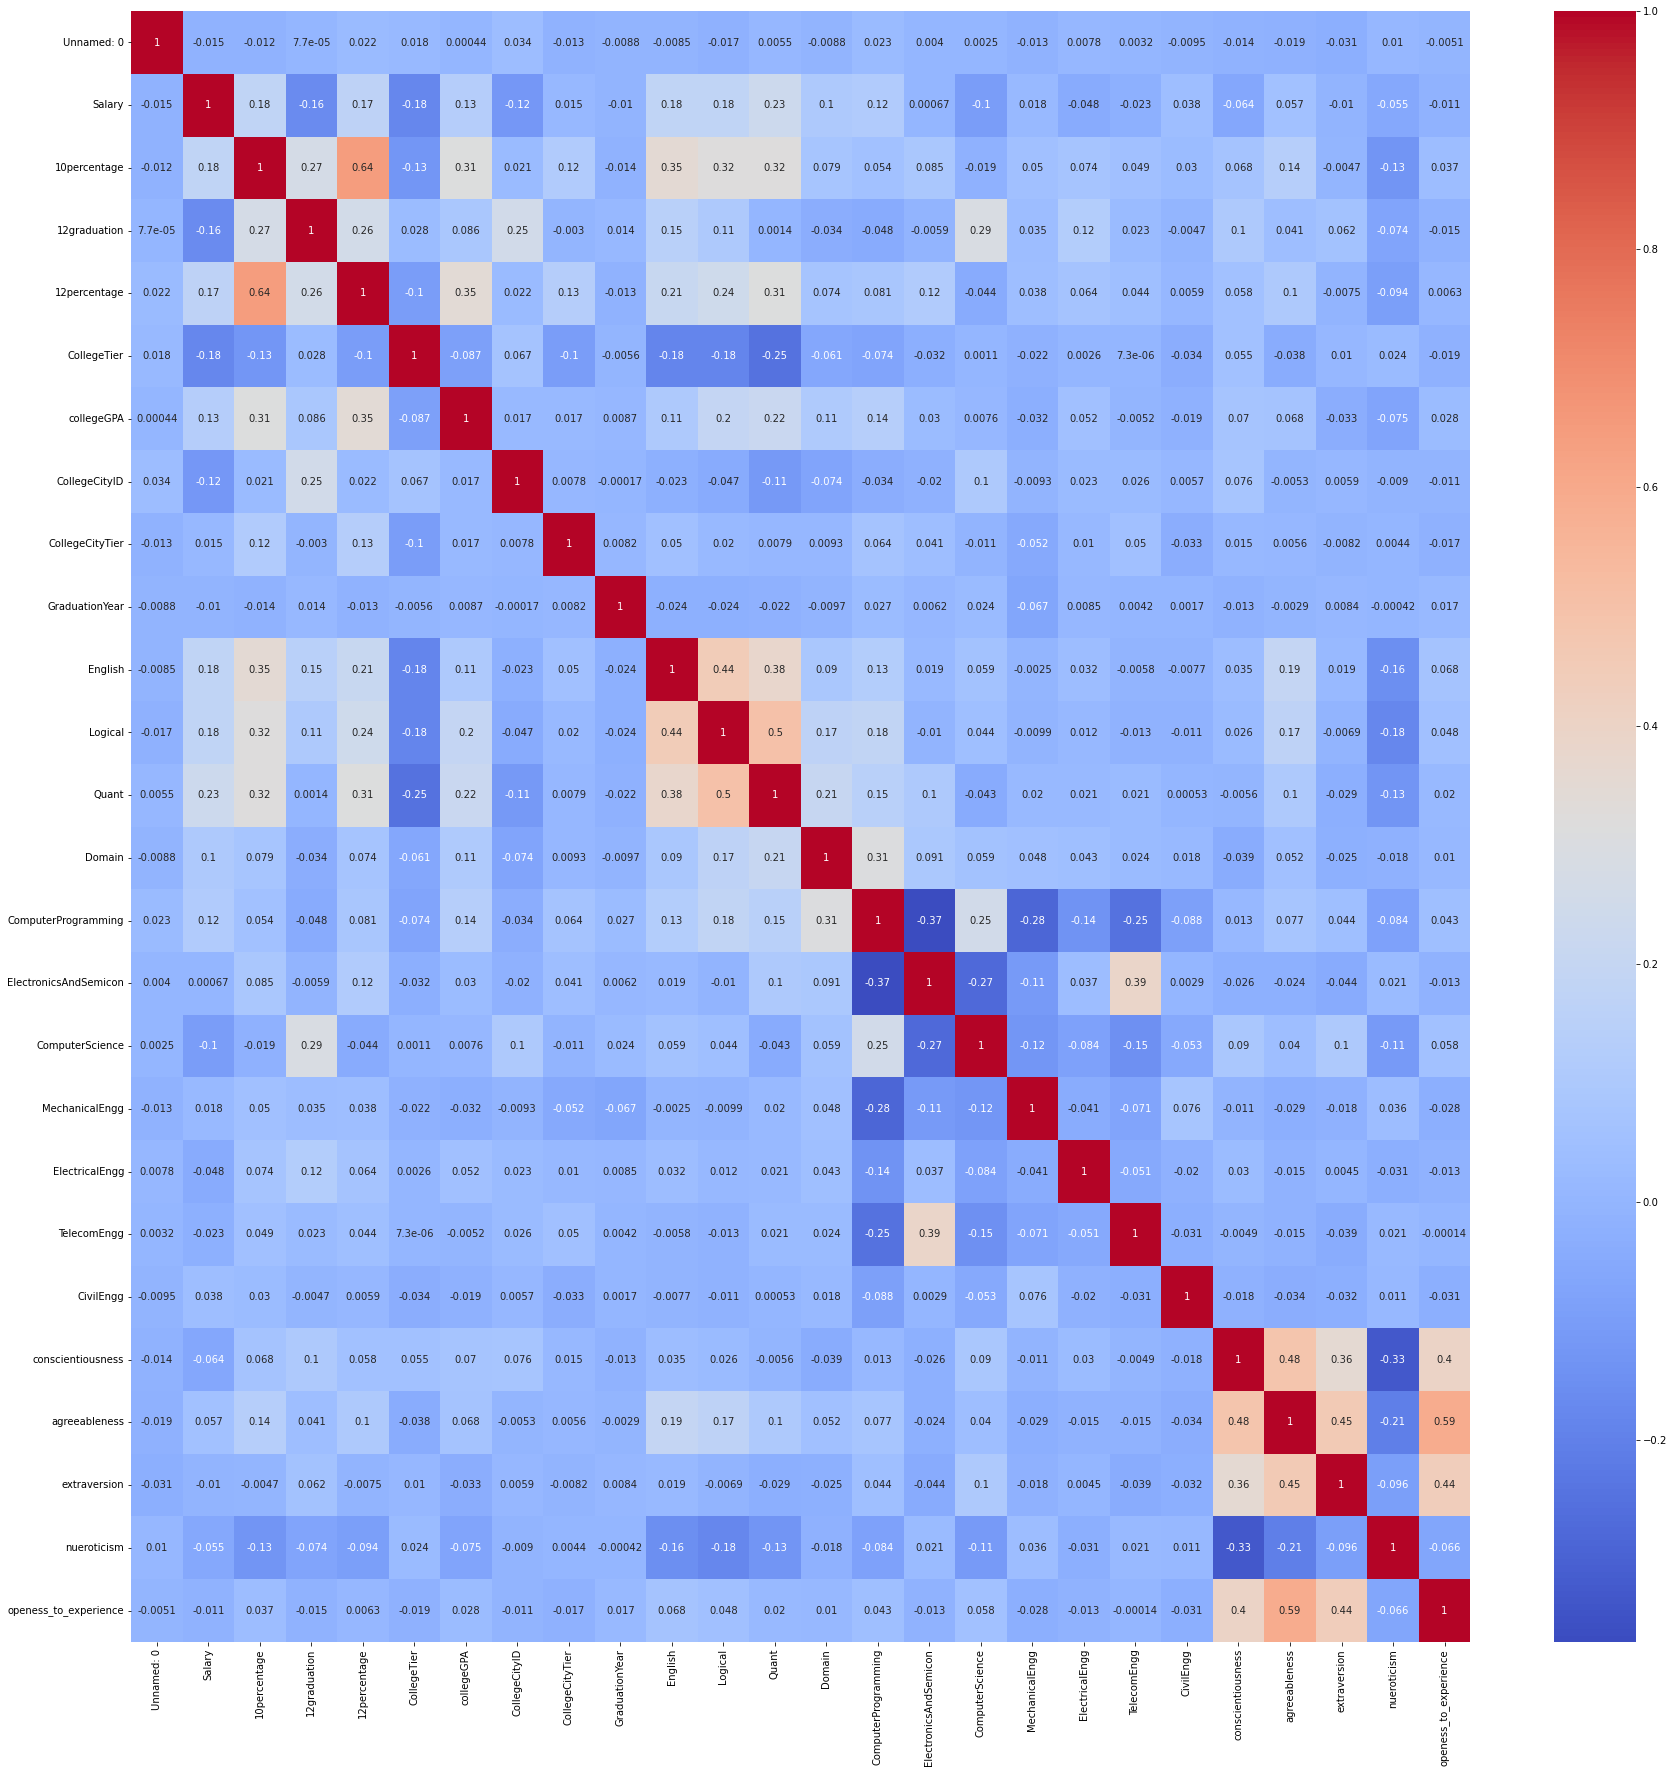

In [43]:
plt.figure(figsize=(30, 30))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

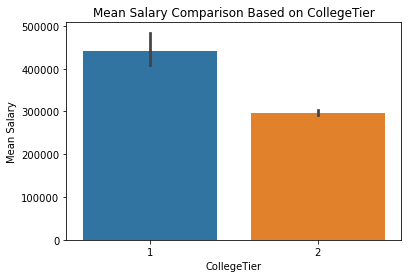

In [44]:
sns.barplot(x="CollegeTier", y="Salary", data=df)
plt.title("Mean Salary Comparison Based on CollegeTier")
plt.xlabel("CollegeTier")
plt.ylabel("Mean Salary")
plt.show()

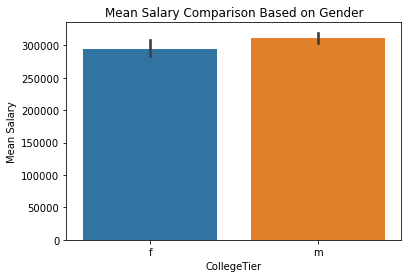

In [45]:
sns.barplot(x="Gender", y="Salary", data=df)
plt.title("Mean Salary Comparison Based on Gender")
plt.xlabel("CollegeTier")
plt.ylabel("Mean Salary")
plt.show()

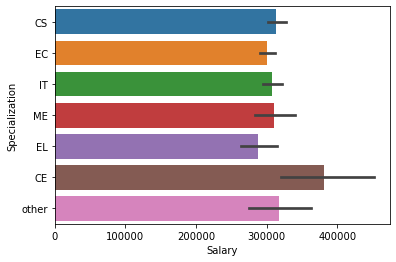

In [46]:
sns.barplot(data=df,y='Specialization',x='Salary')
plt.show()

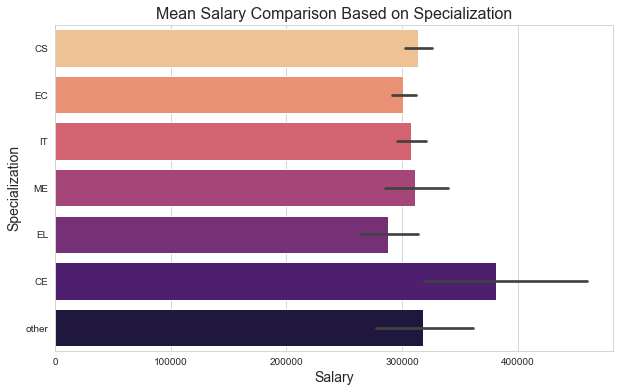

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
palette = sns.color_palette('magma_r', len(df['Specialization'].unique()))
sns.barplot(data=df, y='Specialization', x='Salary', palette=palette)

# Add a title and axis labels
plt.title('Mean Salary Comparison Based on Specialization', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Specialization', fontsize=14)
plt.show()

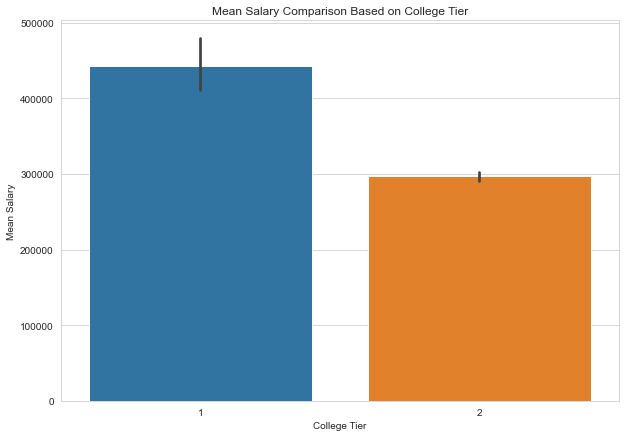

In [48]:
plt.figure(figsize = (10,7))
sns.barplot(x="CollegeTier", y="Salary", data=df)
plt.title("Mean Salary Comparison Based on College Tier")
plt.xlabel("College Tier")
plt.ylabel("Mean Salary")
plt.show()

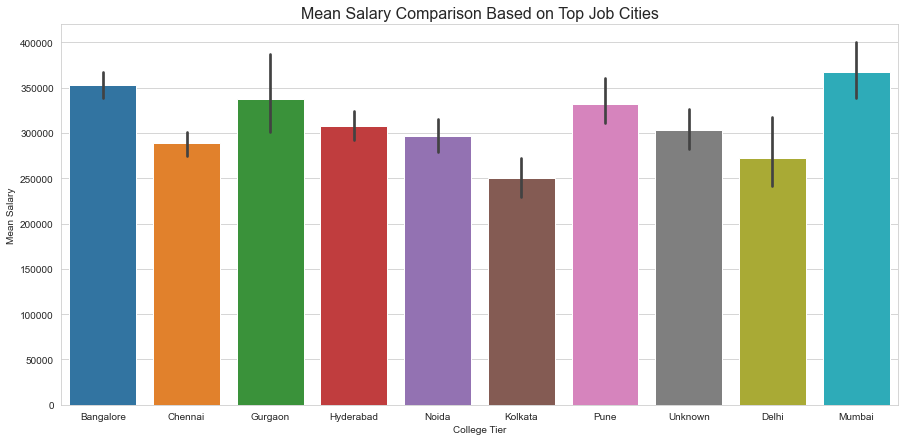

In [49]:
top_cities = df['JobCity'].value_counts().head(10).index.tolist()
df_top_cities = df[df['JobCity'].isin(top_cities)]
plt.figure(figsize = (15,7))
sns.barplot(x="JobCity", y="Salary", data=df_top_cities)
plt.title("Mean Salary Comparison Based on Top Job Cities", fontsize = 16)
plt.xlabel("College Tier")
plt.ylabel("Mean Salary")
plt.show()

### Conclusion
* Job locations Mumbai, Bangalore and Pune are give higher average salary than the others.
* Similarly, Kolkata is having the minimum average salary.

In [53]:
filtered_df =  df[(df['Specialization'] == 'CS') & (df['Designation'].isin(["programmer analyst",
                                                             "software engineer","hardware engineer","associate engineer"]))]
filtered_df

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
19,19,325000,2014-09-01,present,software engineer,Pune,f,1990-11-30,79.00,CBSE,...,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295
20,20,320000,2010-11-01,2012-09-01 00:00:00,software engineer,Bangalore,f,1988-07-25,91.20,StateBoard,...,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444
24,24,335000,2014-06-01,2015-06-01 00:00:00,programmer analyst,Hyderabad,m,1993-06-28,88.00,StateBoard,...,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.9950,-0.6692
31,31,340000,2014-08-01,2015-04-01 00:00:00,software engineer,Bangalore,m,1992-10-23,77.20,StateBoard,...,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.5021,0.2889
36,36,270000,2013-03-01,present,software engineer,Hyderabad,f,1992-08-21,91.50,StateBoard,...,-1,-1,-1,-1,-1,-1.0208,0.2124,0.4711,0.2727,-0.0943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,3968,360000,2013-05-01,2015-01-01 00:00:00,software engineer,Bangalore,f,1990-09-30,81.00,CBSE,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,0.6204,0.3444
3979,3979,550000,2013-07-01,2014-04-01 00:00:00,software engineer,Bangalore,m,1989-07-22,69.16,StateBoard,...,-1,-1,-1,-1,-1,-0.5719,0.5008,-0.4891,0.4148,-1.2354
3981,3981,220000,2014-09-01,present,software engineer,Gurgaon,m,1991-12-17,53.40,CBSE,...,530,-1,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.1218,1.4386
3984,3984,480000,2011-12-01,present,software engineer,Gurgaon,f,1990-01-18,89.80,CBSE,...,-1,-1,-1,-1,-1,-0.2628,0.1888,0.3817,-0.2902,1.6082


In [54]:
import scipy.stats as stats

# Define the null and alternative hypotheses
H0 = "The mean salary of fresh Computer Science Engineering graduates who take up jobs as Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer can earn up to 2.5-3 lakhs"

H1 = "The mean salary of fresh Computer Science Engineering graduates who take up jobs as Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer can not earn upto 2.5-3 lakhs"

# Set the level of significance
alpha = 0.05

# Calculate the sample mean and standard deviation
sample_mean = filtered_df['Salary'].mean()
sample_std = filtered_df['Salary'].std()

# Calculate the t-value and degrees of freedom
mu = 275000
n = filtered_df.shape[0]
t = (sample_mean - mu) / (sample_std / (n ** 0.5))
df = n - 1

# Calculate the critical t-value
critical_t = stats.t.ppf(1 - alpha, df)

# Compare the calculated t-value with the critical t-value
if t > critical_t:
    print("Reject the null hypothesis:", H1)
else:
    print("Fail to reject the null hypothesis:", H0)

Reject the null hypothesis: The mean salary of fresh Computer Science Engineering graduates who take up jobs as Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer can not earn upto 2.5-3 lakhs


In [55]:
# OR
from scipy.stats import ttest_1samp

# Set the significance level
alpha = 0.05

# Set the null hypothesis mean
null_mean = 275000

# Perform one-sample t-test
t_stat, p_val = ttest_1samp(filtered_df['Salary'], null_mean)

# Print the t-statistic and p-value
print('t-statistic:', t_stat)
print('p-value:', p_val)

# Check if p-value is less than the significance level
if p_val < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

t-statistic: 9.062835333300367
p-value: 1.0487959663516946e-17
Reject the null hypothesis


To check whether there is a relationship between gender and specialization, we can perform a chi-square test of independence. This test will help us to determine whether the gender and specialization variables are independent or not.
  1. $H_0$: The null hypothesis would be that there is no relationship between gender and specialization.
  2. $H_1$: The alternate hypothesis would be that there is a relationship between gender and specialization, indicating that the preference for specialization is dependent on the gender.